<a href="https://colab.research.google.com/github/alan7s/cadeia_de_markov_previsao_tempo/blob/main/%20Cadeia-Markov-e-Arvore-Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown <center><h2>Baixar dados</h2></center><br>
#@markdown <center>Necessário rodar essa célula uma primeira vez para o código abaixo funcionar</center>
!wget -q https://raw.githubusercontent.com/alan7s/cadeia_de_markov_previsao_tempo/main/data/bh_pampulha_2021.csv #BAIXA DADOS 2021

,Cidade,Dia,Mes,Ano,Preciptacao,Ocorrencia chuva
0,Belo Horizonte,01,1,2021,0.0,0.0
1,Belo Horizonte,02,1,2021,0.0,0.0
2,Belo Horizonte,03,1,2021,0.0,0.0
3,Belo Horizonte,04,1,2021,5.0,1.0
4,Belo Horizonte,05,1,2021,6.0,1.0
...,...,...,...,...,...,...
360,Belo Horizonte,27,12,2021,24.0,1.0
361,Belo Horizonte,28,12,2021,0.0,0.0
362,Belo Horizonte,29,12,2021,7.0,1.0
363,Belo Horizonte,30,12,2021,18.0,1.0


Verão:
 Probabilidade de chuva seguido de chuva no verão em BH: 0.43333333333333335
 Probabilidade de chuva seguido de sol no verão em BH: 0.5666666666666667
 Probabilidade de sol seguido de chuva no verão em BH: 0.18888888888888888
 Probabilidade de sol seguido de sol no verão em BH: 0.8111111111111111

Matriz probabilidade no verão: 
[[0.43333333 0.56666667]
 [0.18888889 0.81111111]]

Outono:
 Probabilidade de chuva seguido de chuva no outono em BH: 0.15384615384615385
 Probabilidade de chuva seguido de sol no outono em BH: 0.8461538461538461
 Probabilidade de sol seguido de chuva no outono em BH: 0.1978021978021978
 Probabilidade de sol seguido de sol no outono em BH: 0.8021978021978022

Matriz probabilidade no outono: 
[[0.15384615 0.84615385]
 [0.1978022  0.8021978 ]]

Inverno:
 Probabilidade de chuva seguido de chuva no inverno em BH: 0.05434782608695652
 Probabilidade de chuva seguido de sol no inverno em BH: 0.9456521739130435
 Probabilidade de sol seguido de chuva no inverno e

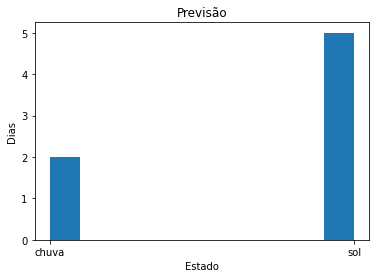


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Teste Efiencia Markov:

As estações e os estados do dia atual são gerados de forma aletaória.
São realizados 1000 testes para cada estação e estado do dia atual de forma aleatória:

Cálculo Acerto para previsão de 3 dias:
Média de acerto Markov : 96.9%

Cálculo Acerto para previsão de 4 dias:
Média de acerto Markov : 79.9%

Cálculo Acerto para previsão de 7 dias:
Média de acerto Markov : 29.3%

Cálculo Acerto para previsão de 10 dias:
Média de acerto Markov : 8.2%


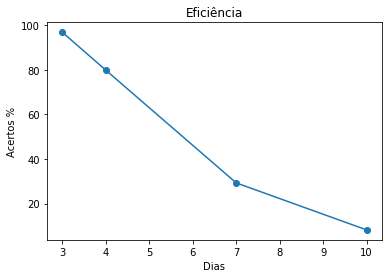

In [ ]:
#@markdown <center><h3><h2>Previsão do tempo</h2>Cadeia de Markov como modelo de previsão do tempo </h3></center><br>
import numpy as np
import random as rm
import time
import pandas as pd
from numpy import linalg as LA
import random as rm
import datetime
import matplotlib.pyplot as plt
import random as rm
#@markdown ---
#@markdown ####Selecione a base de dados
#@markdown Belo Horizonte:
estacao_meteorologica = "bh_pampulha_2021.csv" #@param ["bh_pampulha_2021.csv"] {type:"string"}
#@markdown ---

#@markdown ####Simular previsão para 7 dias
estacao_do_ano = "verao" #@param ["verao", "outono", "inverno", "primavera", "aleatorio"] {type:"string"}
clima_hoje = "chuva" #@param ["chuva", "sol", "aleatorio"] {type:"string"}
previsao_dias = 7
#@markdown ---

data = pd.read_csv(estacao_meteorologica)

dia = []
mes = []
ano = []
for j ,i in enumerate(data['PRECIPITACAO TOTAL']):
  if np.isnan(i):
    data.at[j,'PRECIPITACAO TOTAL'] = 0.0
data=data.groupby(['Data']).sum().reset_index() # .reset_index() REFAZ A TABELA COM A SOMA
for i in data['Data'] :
  d = datetime.datetime.strptime(i, "%Y/%m/%d")
  aux = d.strftime('%m')
  while aux[0] == "0":
    aux = aux[1:]
  dia.append(d.strftime('%d'))
  mes.append(aux)
  ano.append(d.strftime('%Y'))

d = {'Cidade':'Belo Horizonte','Dia':dia,'Mes':mes,'Ano':ano,'Preciptacao':data['PRECIPITACAO TOTAL']}
df = pd.DataFrame(data=d)

new_value=[]
for value in df['Preciptacao']:#valores binarios quando obtiver preciptação ou não
    if value!=0:
        value=1
    new_value.append(value)

df['Ocorrencia chuva']=new_value
display(df)
print('Verão:')
#probabilidade de chover seguido de chuva no verão
Bh_verao_data = df.loc[(df['Mes']==str(1))| (df['Mes']==str(2)) | (df['Mes']==str(3))]
Bh_verao_data2 = Bh_verao_data.copy()
Bh_verao_total_dias = Bh_verao_data['Ocorrencia chuva'].count()
preciptacao_coluna=Bh_verao_data['Ocorrencia chuva']
dias_chuvas=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          dias_chuvas+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior=dia_atual
        
Bh_chuva_seguida_chuva_prob_verao = float(dias_chuvas)/float(Bh_verao_total_dias)
print(f' Probabilidade de chuva seguido de chuva no verão em BH: {Bh_chuva_seguida_chuva_prob_verao}') 

#probabilidade de chover seguido de ensoralado no verão
Bh_chuva_seguida_sol_prob_verao=1-Bh_chuva_seguida_chuva_prob_verao
print(f' Probabilidade de chuva seguido de sol no verão em BH: {Bh_chuva_seguida_sol_prob_verao}') 

dias_chuvas=0
dia_anterior=1
cont_index=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          Bh_verao_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_chuva_prob_verao
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 1:
          Bh_verao_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_sol_prob_verao
        dia_anterior=dia_atual
    cont_index+=1

#probabilidade de sol seguido de chuva no verão
preciptacao_coluna=Bh_verao_data['Ocorrencia chuva']
dias_sol_chuva=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        dias_sol_chuva+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior = dia_atual

Bh_sol_seguida_chuva_prob_verao = float(dias_sol_chuva)/float(Bh_verao_total_dias)

print(f' Probabilidade de sol seguido de chuva no verão em BH: {Bh_sol_seguida_chuva_prob_verao}')

#probabilidade de sol seguido de sol
Bh_sol_seguida_sol_prob_verao=1-Bh_sol_seguida_chuva_prob_verao
print(f' Probabilidade de sol seguido de sol no verão em BH: {Bh_sol_seguida_sol_prob_verao}')

cont_index=0
dias_sol_chuva=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        Bh_verao_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_chuva_prob_verao
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 0:
          Bh_verao_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_sol_prob_verao
        dia_anterior = dia_atual
    cont_index+=1

#matriz de probabilidade no verão
Bh_verao_matriz = np.matrix([[Bh_chuva_seguida_chuva_prob_verao,Bh_chuva_seguida_sol_prob_verao],[Bh_sol_seguida_chuva_prob_verao,Bh_sol_seguida_sol_prob_verao]])
print(f'\nMatriz probabilidade no verão: \n{Bh_verao_matriz}')
#display(Bh_verao_data2)
print('\nOutono:')

#probabilidade de chover seguido de chuva no outono
Bh_outono_data = df.loc[(df['Mes']==str(4))| (df['Mes']==str(5)) | (df['Mes']==str(6))]
Bh_outono_data2 = Bh_outono_data.copy()
Bh_outono_total_dias = Bh_outono_data['Ocorrencia chuva'].count()
preciptacao_coluna = Bh_outono_data['Ocorrencia chuva']
dias_chuvas=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          dias_chuvas+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior=dia_atual

Bh_chuva_seguida_chuva_prob_outono = float(dias_chuvas)/float(Bh_outono_total_dias)
print(f' Probabilidade de chuva seguido de chuva no outono em BH: {Bh_chuva_seguida_chuva_prob_outono}') 

#probabilidade de chover seguido de ensoralado no outono
Bh_chuva_seguida_sol_prob_outono=1-Bh_chuva_seguida_chuva_prob_outono
print(f' Probabilidade de chuva seguido de sol no outono em BH: {Bh_chuva_seguida_sol_prob_outono}') 

cont_index=90
dias_chuvas=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          Bh_outono_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_chuva_prob_outono
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 1:
          Bh_outono_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_sol_prob_outono
        dia_anterior=dia_atual
    cont_index+=1

#probabilidade de sol seguido de chuva no outono
preciptacao_coluna=Bh_outono_data['Ocorrencia chuva']
dias_sol_chuva=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        dias_sol_chuva+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior = dia_atual
Bh_sol_seguida_chuva_prob_outono = float(dias_sol_chuva)/float(Bh_outono_total_dias)
print(f' Probabilidade de sol seguido de chuva no outono em BH: {Bh_sol_seguida_chuva_prob_outono}')

#probabilidade de sol seguido de sol
Bh_sol_seguida_sol_prob_outono=1-Bh_sol_seguida_chuva_prob_outono
print(f' Probabilidade de sol seguido de sol no outono em BH: {Bh_sol_seguida_sol_prob_outono}')

cont_index=90
dias_sol_chuva=0
dia_anterior=1
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        Bh_outono_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_chuva_prob_outono
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 0:
          Bh_outono_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_sol_prob_outono
        dia_anterior = dia_atual
    cont_index+=1

#matriz de probabilidade no outono
Bh_outono_matriz = np.matrix([[Bh_chuva_seguida_chuva_prob_outono,Bh_chuva_seguida_sol_prob_outono],[Bh_sol_seguida_chuva_prob_outono,Bh_sol_seguida_sol_prob_outono]])
print(f'\nMatriz probabilidade no outono: \n{Bh_outono_matriz}')
#display(Bh_outono_data2)
print('\nInverno:')

#probabilidade de chover seguido de chuva no inverno
Bh_inverno_data = df.loc[(df['Mes']==str(7))| (df['Mes']==str(8)) | (df['Mes']==str(9))]
Bh_inverno_data2 = Bh_inverno_data.copy()
Bh_inverno_total_dias = Bh_inverno_data['Ocorrencia chuva'].count()
preciptacao_coluna = Bh_inverno_data['Ocorrencia chuva']
dias_chuvas=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          dias_chuvas+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior=dia_atual

Bh_chuva_seguida_chuva_prob_inverno = float(dias_chuvas)/float(Bh_inverno_total_dias)
print(f' Probabilidade de chuva seguido de chuva no inverno em BH: {Bh_chuva_seguida_chuva_prob_inverno}') 

#probabilidade de chover seguido de ensoralado no inverno
Bh_chuva_seguida_sol_prob_inverno=1-Bh_chuva_seguida_chuva_prob_inverno
print(f' Probabilidade de chuva seguido de sol no inverno em BH: {Bh_chuva_seguida_sol_prob_inverno}') 

cont_index=181
dias_chuvas=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          Bh_inverno_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_chuva_prob_inverno
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 1:
          Bh_inverno_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_sol_prob_inverno
        dia_anterior=dia_atual
    cont_index+=1
#probabilidade de sol seguido de chuva no inverno
preciptacao_coluna=Bh_inverno_data['Ocorrencia chuva']
dias_sol_chuva=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        dias_sol_chuva+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior = dia_atual
Bh_sol_seguida_chuva_prob_inverno = float(dias_sol_chuva)/float(Bh_inverno_total_dias)
print(f' Probabilidade de sol seguido de chuva no inverno em BH: {Bh_sol_seguida_chuva_prob_inverno}')

#probabilidade de sol seguido de sol
Bh_sol_seguida_sol_prob_inverno=1-Bh_sol_seguida_chuva_prob_inverno
print(f' Probabilidade de sol seguido de sol no inverno em BH: {Bh_sol_seguida_sol_prob_inverno}')

cont_index=181
dias_sol_chuva=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        Bh_inverno_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_chuva_prob_inverno
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 0:
          Bh_inverno_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_sol_prob_inverno
        dia_anterior = dia_atual
    cont_index+=1
#matriz de probabilidade no inverno
Bh_inverno_matriz = np.matrix([[Bh_chuva_seguida_chuva_prob_inverno,Bh_chuva_seguida_sol_prob_inverno],[Bh_sol_seguida_chuva_prob_inverno,Bh_sol_seguida_sol_prob_inverno]])
print(f'\nMatriz probabilidade no inverno: \n{Bh_inverno_matriz}')
#display(Bh_inverno_data2)
print('\nPrimavera:')

#probabilidade de chover seguido de chuva no primavera
Bh_primavera_data = df.loc[(df['Mes']==str(10))| (df['Mes']==str(11)) | (df['Mes']==str(12))]
Bh_primavera_data2 = Bh_primavera_data.copy()
Bh_primavera_total_dias = Bh_primavera_data['Ocorrencia chuva'].count()
preciptacao_coluna = Bh_primavera_data['Ocorrencia chuva']
dias_chuvas=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          dias_chuvas+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior=dia_atual

Bh_chuva_seguida_chuva_prob_primavera = float(dias_chuvas)/float(Bh_primavera_total_dias)
print(f' Probabilidade de chuva seguido de chuva no primavera em BH: {Bh_chuva_seguida_chuva_prob_primavera}') 

#probabilidade de chover seguido de ensoralado no primavera
Bh_chuva_seguida_sol_prob_primavera=1-Bh_chuva_seguida_chuva_prob_primavera
print(f' Probabilidade de chuva seguido de sol no primavera em BH: {Bh_chuva_seguida_sol_prob_primavera}') 

cont_index=273
dias_chuvas=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1:
        if dia_anterior==1:
          Bh_primavera_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_chuva_prob_primavera        
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 1:
          Bh_primavera_data2.at[cont_index,'Ocorrencia chuva']=Bh_chuva_seguida_sol_prob_primavera
        dia_anterior=dia_atual
    cont_index+=1

#probabilidade de sol seguido de chuva no primavera
preciptacao_coluna=Bh_primavera_data['Ocorrencia chuva']
dias_sol_chuva=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        dias_sol_chuva+=1
        dia_anterior=dia_atual
    elif dia_atual == 0:
        dia_anterior = dia_atual

Bh_sol_seguida_chuva_prob_primavera = float(dias_sol_chuva)/float(Bh_primavera_total_dias)
print(f' Probabilidade de sol seguido de chuva no primavera em BH: {Bh_sol_seguida_chuva_prob_primavera}')

#probabilidade de sol seguido de sol
Bh_sol_seguida_sol_prob_primavera=1-Bh_sol_seguida_chuva_prob_primavera
print(f' Probabilidade de sol seguido de sol no primavera em BH: {Bh_sol_seguida_sol_prob_primavera}')

cont_index=273
dias_sol_chuva=0
dia_anterior=0
for dia_atual in preciptacao_coluna:
    if dia_atual ==1 and dia_anterior==0:
        Bh_primavera_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_chuva_prob_primavera
        dia_anterior=dia_atual
    elif dia_atual == 0:
        if dia_anterior == 0:
          Bh_primavera_data2.at[cont_index,'Ocorrencia chuva']=Bh_sol_seguida_sol_prob_primavera
        dia_anterior = dia_atual
    cont_index+=1
#matriz de probabilidade no primavera
Bh_primavera_matriz = np.matrix([[Bh_chuva_seguida_chuva_prob_primavera,Bh_chuva_seguida_sol_prob_primavera],[Bh_sol_seguida_chuva_prob_primavera,Bh_sol_seguida_sol_prob_primavera]])
print(f'\nMatriz probabilidade na primavera: \n{Bh_primavera_matriz}')

#Definindo espaço de estado
estacao = ["verao","outono","inverno","primavera"]
#possibilidade sequencia de eventos
estados = ['chuva','sol']
estados_dias = [["chuvaChuva","chuvaSol"],["solChuva","solSol"]]

Bh_prob_verao = [[Bh_chuva_seguida_chuva_prob_verao,Bh_chuva_seguida_sol_prob_verao],[Bh_sol_seguida_chuva_prob_verao,Bh_sol_seguida_sol_prob_verao]]
Bh_prob_outono = [[Bh_chuva_seguida_chuva_prob_outono,Bh_chuva_seguida_sol_prob_outono],[Bh_sol_seguida_chuva_prob_outono,Bh_sol_seguida_sol_prob_outono]]
Bh_prob_inverno = [[Bh_chuva_seguida_chuva_prob_inverno,Bh_chuva_seguida_sol_prob_inverno],[Bh_sol_seguida_chuva_prob_inverno,Bh_sol_seguida_sol_prob_inverno]]
Bh_prob_primavera = [[Bh_chuva_seguida_chuva_prob_primavera,Bh_chuva_seguida_sol_prob_primavera],[Bh_sol_seguida_chuva_prob_primavera,Bh_sol_seguida_sol_prob_primavera]]

def previsao(qntDias,e_ano,c_hoje):
  previsaoTempo=[]
  tempoHoje = c_hoje
  estacaoHoje = e_ano
  dia = 0
  while dia < qntDias:
    if estacaoHoje == "verao":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_verao[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_verao[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'
    elif estacaoHoje == "outono":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_outono[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_outono[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'  
    elif estacaoHoje == "inverno":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_inverno[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_inverno[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'
    elif estacaoHoje == "primavera":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_primavera[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_primavera[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva' 
    dia=dia+1
    previsaoTempo.append(tempoHoje)
  return previsaoTempo

def SubArray(previsaoTmp,arrayEstacao):
  i = 0 
  j = 0
  while ((i < len(arrayEstacao) - 1) and (j < len(previsaoTmp) - 1)):
     if (arrayEstacao[i] == previsaoTmp[j]):
      i = i + 1
      j = j + 1
      if (j == len(previsaoTmp) - 1):
        return True
     else:
      i = i - j + 1
      j = 0

  return False

def comparacao_markov(total_dias,N):

  data=df.copy()
  mat1=[]
  mat2=[]
  dia = 1
  for i in data['Ocorrencia chuva']:
    if dia <= total_dias:
      dia = dia+1
      if i == 1.0:
          mat1.append('chuva')
      else:
          mat1.append('sol')
      if dia == total_dias:
        mat2.append(mat1)
        mat1 = []
        dia = 1

  data = pd.DataFrame(mat2)
  data['Estacao'] = np.nan
  verao='verao'
  outono='outono'
  inverno='inverno'
  primavera='primavera'
  array_semanas=[]
  semana=1
  cont=1
  estacao2=""
  sem_final = round(90/total_dias)
  for i in data['Estacao']:
    if semana <= sem_final:
      semana = semana+1
      if cont == 1:
        estacao2=verao
      elif cont ==2:
        estacao2=outono
      elif cont==3:
        estacao2=inverno
      elif cont==4:
        estacao2=primavera
      if semana == sem_final:
        semana=1
        cont=cont+1
      array_semanas.append(estacao2)

  data['Estacao'] = array_semanas

  for i in range(N):
    var_dia='Dia '
    var_dia+=str(i+1)
    data=data.rename(columns={i:var_dia})
  
  array_vazio1 = []
  array_vazio2 = []

  for i in range(len(data)-1):
    array_vazio2 = []
    for j in range(total_dias):
        array_vazio2.append(data.loc[i][j])
    array_vazio1.append(array_vazio2)

  correto = 0

  array_aux = []
  for i in range(N):
    estados_a = rm.choice(estados)
    estacao_a = rm.choice(estacao)
    previsaotmp = previsao(total_dias-1,estacao_a ,estados_a)
    array_aux = previsaotmp
    array_aux.append(estacao_a)
    for i in array_vazio1:
      a1 = np.array(i)
      a2 = np.array(array_aux)
      if np.array_equal(a1,a2) == True:
        correto = correto + 1
        break

  percent_acerto_markov=(correto/N)
  percent_acerto_markov = percent_acerto_markov*100
  return percent_acerto_markov

if estacao_do_ano == 'aleatorio':
  estacao_do_ano=rm.choice(estacao)
if clima_hoje == 'aleatorio':
  clima_hoje=rm.choice(estados)


#display(result)

def calcprob(previsaotmp_e,estacao_do_ano_e,clima_hoje_e):
  arraay=[]
  dia_anterior = clima_hoje_e
  for i in previsaotmp_e:
    if estacao_do_ano_e == 'verao':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_verao)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_verao)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_verao)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_verao)
        dia_anterior=i
    elif estacao_do_ano_e == 'outono':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_outono)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_outono)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_outono)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_outono)
        dia_anterior=i
    elif estacao_do_ano_e == 'inverno':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_inverno)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_inverno)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_inverno)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_inverno)
        dia_anterior=i
    elif estacao_do_ano_e == 'primavera':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_primavera)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_primavera)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_primavera)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_primavera)
        dia_anterior=i
  return arraay
print(f"\n~~~~~~~~Previsão Para 7 dias~~~~~~~~~~~~~")
print(f"\nEstação selecionada: {estacao_do_ano}\n")
print(f"Hoje está com: {clima_hoje}\n")
frames = [Bh_verao_data2,Bh_outono_data2,Bh_inverno_data2,Bh_primavera_data2]
result = pd.concat(frames)
previsaotmp=previsao(previsao_dias,estacao_do_ano,clima_hoje)
print('Amanhã: ',previsaotmp)
arr=calcprob(previsaotmp,estacao_do_ano,clima_hoje)
print('Probabilidades: ',arr)
plt.figure()
plt.title('Previsão')
plt.xlabel('Estado')
plt.ylabel('Dias')
plt.hist(previsaotmp)
plt.show()
print(f"\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print('Teste Efiencia Markov:\n')
print('As estações e os estados do dia atual são gerados de forma aletaória.')
print('São realizados 1000 testes para cada estação e estado do dia atual de forma aleatória:')
print('\nCálculo Acerto para previsão de 3 dias:')
dia3=comparacao_markov(4,1000)
print('Média de acerto Markov : {:.1f}'.format(dia3)+'%')
print('\nCálculo Acerto para previsão de 4 dias:')
dia4=comparacao_markov(5,1000)
print('Média de acerto Markov : {:.1f}'.format(dia4)+'%')
print('\nCálculo Acerto para previsão de 7 dias:')
dia7=comparacao_markov(8,1000)
print('Média de acerto Markov : {:.1f}'.format(dia7)+'%')
print('\nCálculo Acerto para previsão de 10 dias:')
dia10=comparacao_markov(11,1000)
print('Média de acerto Markov : {:.1f}'.format(dia10)+'%')
ydiasprev=[dia3,dia4,dia7,dia10]
xdiasprev=[3,4,7,10]
plt.plot(xdiasprev,ydiasprev, 'o-')
plt.title('Eficiência')
plt.xlabel('Dias')
plt.ylabel('Acertos %')
plt.show()

In [ ]:
#@markdown <center><h2>Ajustar dataset</h2></center><br>
#@markdown <center>Cria dataset com as probabilidades de transição para todas as semanas do ano</center>
data=result.copy()

mat1=[]
mat2=[]
dia = 1
#for i in df['Preciptacao']:
for i in data['Ocorrencia chuva']:
  if dia <= 8:
    dia = dia+1
    mat1.append(i)
    if dia == 8:
      mat2.append(mat1)
      mat1 = []
      dia = 1
  
data = pd.DataFrame(mat2)
data['Estacao'] = np.nan

verao='verao'
outono='outono'
inverno='inverno'
primavera='primavera'

array_semanas=[]
semana=1
cont=1
estacao=""
for i in data['Estacao']:
  if semana <= 14:
    semana = semana+1
    if cont == 1:
      estacao=verao
    elif cont ==2:
      estacao=outono
    elif cont==3:
      estacao=inverno
    elif cont==4:
      estacao=primavera
    if semana == 14:
      semana=1
      cont=cont+1
    array_semanas.append(estacao)

data['Estacao'] = array_semanas
data.columns = ['Dia 1', 'Dia 2', 'Dia 3', 'Dia 4', 'Dia 5', 'Dia 6', 'Dia 7', 'Estacao']

display(data)

,Dia 1,Dia 2,Dia 3,Dia 4,Dia 5,Dia 6,Dia 7,Estacao
0,0.244444,0.244444,0.244444,0.244444,0.244444,0.244444,0.244444,verao
1,0.244444,0.244444,0.755556,0.866667,0.133333,0.755556,0.866667,verao
2,0.133333,0.755556,0.866667,0.866667,0.866667,0.866667,0.866667,verao
3,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,verao
4,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,0.866667,verao
5,0.133333,0.244444,0.244444,0.244444,0.755556,0.866667,0.133333,verao
6,0.244444,0.755556,0.133333,0.755556,0.866667,0.133333,0.244444,verao
7,0.244444,0.755556,0.866667,0.133333,0.244444,0.755556,0.866667,verao
8,0.133333,0.244444,0.244444,0.755556,0.866667,0.866667,0.866667,verao
9,0.866667,0.133333,0.244444,0.244444,0.244444,0.244444,0.755556,verao


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
X = data.drop("Estacao", axis=1)
y = data['Estacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

#tree = DecisionTreeClassifier(max_depth=8,random_state=42) #acurácia 0.81 limita profundidade a 8 
tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2,random_state=0) #encontre a arvore mais profunda mas com no minimo 2 exemplos no final
tree.fit(X_train.values, y_train.values)
p = tree.predict(X_test.values)
print("Acurácia:",metrics.accuracy_score(y_test, p))

Acurácia: 1.0


[Text(0.6, 0.9, 'Dia 1 <= 0.9\ngini = 0.73\nsamples = 36\nvalue = [5, 12, 10, 9]\nclass = outono'),
 Text(0.4, 0.7, 'Dia 7 <= 0.846\ngini = 0.499\nsamples = 19\nvalue = [0, 0, 10, 9]\nclass = inverno'),
 Text(0.3, 0.5, 'Dia 3 <= 0.253\ngini = 0.408\nsamples = 14\nvalue = [0, 0, 10, 4]\nclass = inverno'),
 Text(0.2, 0.3, 'Dia 4 <= 0.253\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4]\nclass = primavera'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]\nclass = primavera'),
 Text(0.3, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1]\nclass = inverno'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]\nclass = inverno'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5]\nclass = primavera'),
 Text(0.8, 0.7, 'Dia 1 <= 0.945\ngini = 0.415\nsamples = 17\nvalue = [5, 12, 0, 0]\nclass = outono'),
 Text(0.7, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0]\nclass = outono'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]\nclass 

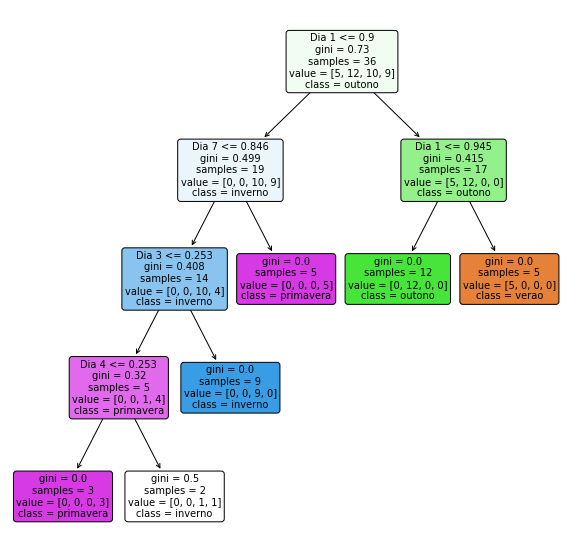

In [ ]:
pylab.figure(figsize=(10,10))
plot_tree(tree, feature_names=X_train.columns,class_names=y_train.values, filled=True, rounded=True)

In [ ]:
entrada=arr #recebe previsão de markov
result = str(tree.predict([entrada])) #retorna a provável estação na qual a previsão foi feita
print(result)

['verao']


# **Avaliando**

In [ ]:
#@markdown <center><h3><h2>Recarregar base de dados</h2>Executar para poder avaliar</h3></center><br>
estacao_meteorologica = "bh_pampulha_2021.csv"


data = pd.read_csv(estacao_meteorologica)

dia = []
mes = []
ano = []
for j ,i in enumerate(data['PRECIPITACAO TOTAL']):
  if np.isnan(i):
    data.at[j,'PRECIPITACAO TOTAL'] = 0.0
data=data.groupby(['Data']).sum().reset_index() # .reset_index() REFAZ A TABELA COM A SOMA
for i in data['Data'] :
  d = datetime.datetime.strptime(i, "%Y/%m/%d")
  aux = d.strftime('%m')
  while aux[0] == "0":
    aux = aux[1:]
  dia.append(d.strftime('%d'))
  mes.append(aux)
  ano.append(d.strftime('%Y'))

d = {'Cidade':'Belo Horizonte','Dia':dia,'Mes':mes,'Ano':ano,'Preciptacao':data['PRECIPITACAO TOTAL']}
df2 = pd.DataFrame(data=d)

new_value=[]
for value in df2['Preciptacao']:#valores binarios quando obtiver preciptação ou não
    if value!=0:
        value=1
    new_value.append(value)

df2['Ocorrencia chuva']=new_value
#display(df2)

mat1=[]
mat2=[]
dia = 1
#for i in df['Preciptacao']:
for i in df2['Ocorrencia chuva']:
  if dia <= 8:
    dia = dia+1
    #mat1.append(i)
    if i == 1.0:
      mat1.append('chuva')
    else:
      mat1.append('sol')
    if dia == 8:
      mat2.append(mat1)
      mat1 = []
      dia = 1
  

df2 = pd.DataFrame(mat2)
df2['Estacao'] = np.nan
#display(df)

verao='verao'
outono='outono'
inverno='inverno'
primavera='primavera'

array_semanas=[]
semana=1
cont=1
estacao=""
for i in df2['Estacao']:
  if semana <= 14:
    semana = semana+1
    if cont == 1:
      estacao=verao
    elif cont ==2:
      estacao=outono
    elif cont==3:
      estacao=inverno
    elif cont==4:
      estacao=primavera
    if semana == 14:
      semana=1
      cont=cont+1
    array_semanas.append(estacao)

df2['Estacao'] = array_semanas
df2.columns = ['Dia 1', 'Dia 2', 'Dia 3', 'Dia 4', 'Dia 5', 'Dia 6', 'Dia 7', 'Estacao']
data3=df2

#display(data3)

In [ ]:
#@markdown <center><h3><h2>Carregar Simulação Previsão do Tempo</h2>Executar para poder avaliar</h3></center><br>
#Definindo espaço de estado
estacao = ["verao","outono","inverno","primavera"]
#possibilidade sequencia de eventos
estados = ['chuva','sol']
estados_dias = [["chuvaChuva","chuvaSol"],["solChuva","solSol"]]

Bh_prob_verao = [[Bh_chuva_seguida_chuva_prob_verao,Bh_chuva_seguida_sol_prob_verao],[Bh_sol_seguida_chuva_prob_verao,Bh_sol_seguida_sol_prob_verao]]
Bh_prob_outono = [[Bh_chuva_seguida_chuva_prob_outono,Bh_chuva_seguida_sol_prob_outono],[Bh_sol_seguida_chuva_prob_outono,Bh_sol_seguida_sol_prob_outono]]
Bh_prob_inverno = [[Bh_chuva_seguida_chuva_prob_inverno,Bh_chuva_seguida_sol_prob_inverno],[Bh_sol_seguida_chuva_prob_inverno,Bh_sol_seguida_sol_prob_inverno]]
Bh_prob_primavera = [[Bh_chuva_seguida_chuva_prob_primavera,Bh_chuva_seguida_sol_prob_primavera],[Bh_sol_seguida_chuva_prob_primavera,Bh_sol_seguida_sol_prob_primavera]]

def previsao(qntDias,e_ano,c_hoje):
  previsaoTempo=[]
  tempoHoje = c_hoje
  estacaoHoje = e_ano
  dia = 0
  while dia < qntDias:
    if estacaoHoje == "verao":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_verao[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_verao[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'
    elif estacaoHoje == "outono":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_outono[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_outono[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'  
    elif estacaoHoje == "inverno":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_inverno[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_inverno[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva'
    elif estacaoHoje == "primavera":
      if tempoHoje == "chuva":
        escolhe = np.random.choice(estados_dias[0], replace=True, p=Bh_prob_primavera[0])
        if escolhe == 'chuvaChuva':
          pass
        else:
          tempoHoje = 'sol'
      elif tempoHoje == 'sol':
        escolhe = np.random.choice(estados_dias[1], replace=True, p=Bh_prob_primavera[1])
        if escolhe == 'solSol':
          pass
        else:
          tempoHoje='chuva' 
    dia=dia+1
    previsaoTempo.append(tempoHoje)
  return previsaoTempo

if estacao_do_ano == 'aleatorio':
  estacao_do_ano=rm.choice(estacao)
if clima_hoje == 'aleatorio':
  clima_hoje=rm.choice(estados)

#print(f"\n~~~~~~~~Previsão~~~~~~~~~~~~~")
#print(f"\nEstação selecionada: {estacao_do_ano}\n")
#print(f"Hoje está com: {clima_hoje}\n")
previsaotmp=previsao(previsao_dias,estacao_do_ano,clima_hoje)
#print('Amanhã: ',previsaotmp)

frames = [Bh_verao_data2,Bh_outono_data2,Bh_inverno_data2,Bh_primavera_data2]
result = pd.concat(frames)
#display(result)

def calcprob(previsaotmp_e,estacao_do_ano_e,clima_hoje_e):
  arraay=[]
  dia_anterior = clima_hoje_e
  for i in previsaotmp_e:
    if estacao_do_ano_e == 'verao':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_verao)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_verao)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_verao)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_verao)
        dia_anterior=i
    elif estacao_do_ano_e == 'outono':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_outono)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_outono)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_outono)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_outono)
        dia_anterior=i
    elif estacao_do_ano_e == 'inverno':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_inverno)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_inverno)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_inverno)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_inverno)
        dia_anterior=i
    elif estacao_do_ano_e == 'primavera':
      if i == 'chuva':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_chuva_prob_primavera)
        else:
          arraay.append(Bh_sol_seguida_chuva_prob_primavera)
        dia_anterior=i
      elif i == 'sol':
        if dia_anterior == 'chuva':
          arraay.append(Bh_chuva_seguida_sol_prob_primavera)
        else:
          arraay.append(Bh_sol_seguida_sol_prob_primavera)
        dia_anterior=i
  return arraay

arr=calcprob(previsaotmp,estacao_do_ano,clima_hoje)
#print('Probabilidades: ',arr)
#print(f"\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

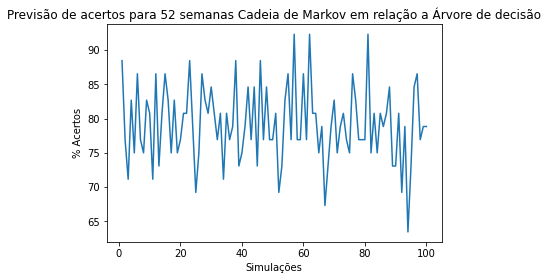

Média de acertos Cadeia de Markov em relação a Árvore de Decisão: 79.2%
Média de acertos da Cadeia Markov em relação a Dados Reais 2021 : 55.6%


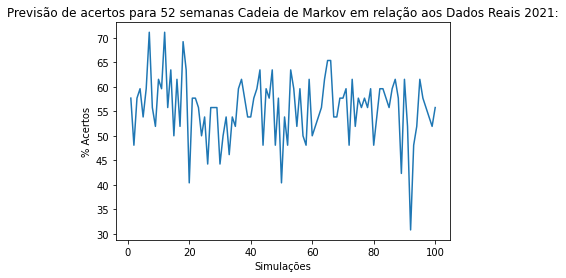

In [ ]:
#data.to_csv('data.csv',index=False)
previsaotmp2=previsaotmp.copy

array_vazio1 = []
array_vazio2 = []
for i in range(len(data3)):
  array_vazio2 = []
  for j in range(8):
    array_vazio2.append(data3.loc[i][j])
  array_vazio1.append(array_vazio2)


import matplotlib.pyplot as plt
#@markdown ####Simular
dados_tamanho=52
simulacoes=100 #@param {type:"slider", min:10, max:100, step:10}
#@markdown ---
error=[]
acertos=[]
cont_estacao=0
correto=0
percent_markov_acertos = []
for k in range(simulacoes):
  x_testes=[]
  y_testes=[]
  #dados_tamanho+=1
  for k in range(dados_tamanho):
    array_aux=[]
    x_estacao_do_ano=rm.choice(estacao)
    x_clima_hoje=rm.choice(estados)
    x_previsaotmp=previsao(7,x_estacao_do_ano,x_clima_hoje)
    array_aux = x_previsaotmp
    x_testes.append(calcprob(x_previsaotmp,x_estacao_do_ano,x_clima_hoje))
    y_testes.append(x_estacao_do_ano)
    array_aux.append(x_estacao_do_ano)
    cont_estacao+=1
    for i in array_vazio1:
      a1 = np.array(i)
      a2 = np.array(array_aux)
      if np.array_equal(a1,a2) == True:
        correto+=1
        break
  cont_testes = 0
  hit=0
  cont_estacao=0
  for i in x_testes:
    result = (tree.predict([i]))
    if result[0] == y_testes[cont_testes]:
      hit+=1
    cont_testes+=1
  percent_acerto_markov=correto/dados_tamanho
  percent_acerto=hit/len(y_testes)
  acertos.append(percent_acerto*100)
  percent_markov_acertos.append(percent_acerto_markov*100)
  error.append((1-percent_acerto))
  correto = 0


media = sum(acertos)/len(acertos)
plt.plot(range(1,len(acertos)+1),acertos)
plt.title('Previsão de acertos para 52 semanas Cadeia de Markov em relação a Árvore de decisão')
plt.xlabel('Simulações')
plt.ylabel('% Acertos')
plt.show()
print("Média de acertos Cadeia de Markov em relação a Árvore de Decisão: {:.1f}".format(media)+"%")
media_markov = sum(percent_markov_acertos)/len(percent_markov_acertos)
print("Média de acertos da Cadeia Markov em relação a Dados Reais 2021: {:.1f}".format(media_markov)+"%")
plt.plot(range(1,len(percent_markov_acertos)+1),percent_markov_acertos)
plt.title('Previsão de acertos para 52 semanas Cadeia de Markov em relação aos Dados Reais 2021:')
plt.xlabel('Simulações')
plt.ylabel('% Acertos')
plt.show()